# Hands-On Exercise: Training a Neural Network to Classify Fashion Items Using PyTorch and the Fashion-MNIST Dataset

## Objective:
In this exercise, you will train a neural network to classify images of clothing items from the Fashion-MNIST dataset using PyTorch. The goal is to learn how to preprocess data, build a neural network for image classification, train the model, and evaluate its performance.


## Prerequisites:
- Basic understanding of Python and machine learning concepts.
- Familiarity with deep learning and PyTorch.


## Step 1: Setup and Installations
**Objective**: Ensure that PyTorch and other required libraries are installed.

**Instructions**: Install the necessary libraries using pip if they are not already installed.


In [ ]:
!pip install torch torchvision matplotlib


## Step 2: Import Necessary Libraries
**Objective**: Import the libraries needed for loading the dataset, building the model, training, and visualization.

**Instructions**:


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
import matplotlib.pyplot as plt


## Step 3: Load and Explore the Fashion-MNIST Dataset
**Objective**: Load the Fashion-MNIST dataset and explore its structure.

**Instructions**:
- Use `torchvision.datasets` to load the dataset.
- Apply necessary transformations, such as converting images to tensors and normalizing them.


Number of training samples: 60000
Number of test samples: 10000


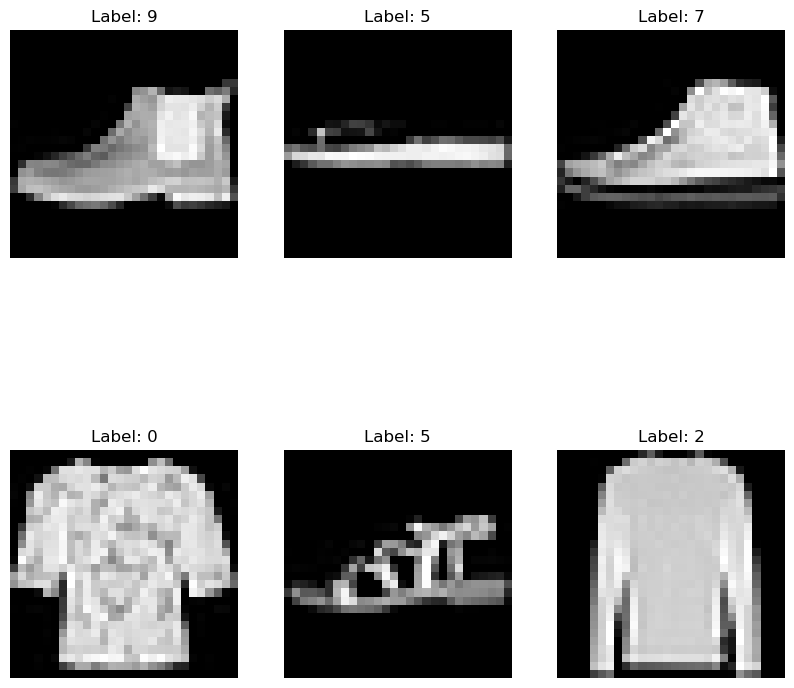

In [9]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Increase the batch size for faster training
train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=256, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1000, shuffle=False)

# Explore the dataset
print(f"Number of training samples: {len(train_dataset)}")
print(f"Number of test samples: {len(test_dataset)}")

# Visualize some training data
examples = enumerate(train_loader)
batch_idx, (example_data, example_targets) = next(examples)
plt.figure(figsize=(10,10))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(example_data[i][0], cmap='gray')
    plt.title(f"Label: {example_targets[i]}")
    plt.axis('off')
plt.show()



## Step 4: Build the Neural Network
**Objective**: Define a simple Convolutional Neural Network (CNN) for image classification.

**Instructions**:
- Use PyTorch’s `nn.Module` to create the model.
- Include convolutional layers, pooling layers, and fully connected layers.


In [10]:
class FashionMNISTModel(nn.Module):
    def __init__(self):
        super(FashionMNISTModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.fc1 = nn.Linear(64 * 5 * 5, 128)  # Adjust this according to the correct flattened size
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2)
        x = x.view(-1, 64 * 5 * 5)  # Dynamically compute the flattened size
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

# Instantiate the model
model = FashionMNISTModel()
print(model)



FashionMNISTModel(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=1600, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


## Step 5: Define the Loss Function and Optimizer
**Objective**: Set up the loss function and optimizer for training.

**Instructions**:
- Use Cross-Entropy Loss for multi-class classification.
- Use an optimizer like Adam to update the model weights.


In [11]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


## Step 6: Train the Model
**Objective**: Train the neural network on the training data.

**Instructions**:
- Iterate through the training data for a set number of epochs.
- For each epoch, perform forward and backward passes, and update the model weights.


In [12]:
epochs = 5
for epoch in range(epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0

    for batch_idx, (data, target) in enumerate(train_loader):
        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        output = model(data)
        loss = criterion(output, target)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f'Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):.4f}')


Epoch 1/5, Loss: 0.6049
Epoch 2/5, Loss: 0.3815
Epoch 3/5, Loss: 0.3303
Epoch 4/5, Loss: 0.2955
Epoch 5/5, Loss: 0.2697


## Step 7: Evaluate the Model
**Objective**: Evaluate the model's performance on the test dataset.

**Instructions**:
- After training, evaluate the model's accuracy on the test data.
- Calculate the accuracy by comparing the predicted labels with the true labels.


In [ ]:
model.eval()  # Set the model to evaluation mode
correct = 0
total = 0
with torch.no_grad():
    for data, target in test_loader:
        output = model(data)
        _, predicted = torch.max(output.data, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()

print(f'Accuracy on test set: {100 * correct / total:.2f}%')


## Step 8: Visualize the Results
**Objective**: Visualize some of the model's predictions on the test data.

**Instructions**:
- Show images from the test dataset along with their predicted labels.


In [ ]:
model.eval()
with torch.no_grad():
    data, target = next(iter(test_loader))
    output = model(data)
    _, preds = torch.max(output, 1)

plt.figure(figsize=(10,10))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(data[i][0], cmap='gray')
    plt.title(f"True: {target[i]}, Pred: {preds[i]}")
    plt.axis('off')
plt.show()


## Step 9: Analyze the Results
**Objective**: Understand the model's performance.

**Instructions**:
- Discuss how well the model performed in classifying the images.
- Consider whether the model has underfitted or overfitted the data.
- Discuss possible ways to improve the model, such as tuning hyperparameters, adding regularization, or using a more complex architecture.


## Step 10: Extend the Exercise
**Objective**: Encourage further exploration.

**Instructions**:
- Experiment with different neural network architectures (e.g., more layers, dropout, batch normalization).
- Try different learning rates or optimizers.
- Use data augmentation to improve the model's robustness.


## Wrap-Up
- **Reflection**: Discuss what you learned about training neural networks for image classification tasks, and the importance of choosing the right model architecture and hyperparameters.
- **Submission**: Submit your completed notebook along with a short report on your findings.
